# INTRODUCTION

Cette étude de cas est le Capstone Project du Certificat Professionnelle Google Data Analytics. Les 6 étapes de l'analyse des données sont utilisées pour présenter cette analyse.

Titre: Bellabeat Case Study

Auteur: Haseeb MOHAMMAD

Date: 23 Novembre 2022

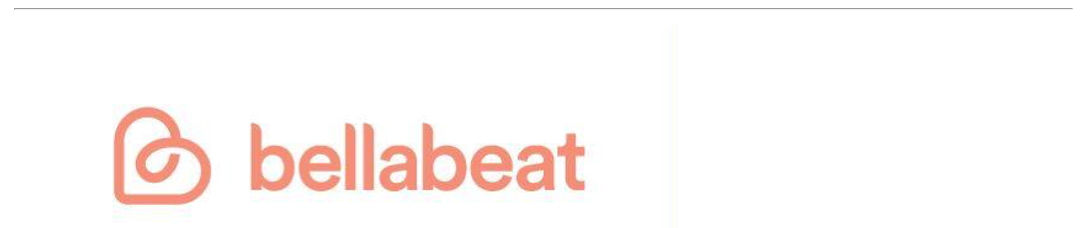

## Bellabeat : Comment une entreprise de technologie du bien-être peut-elle jouer intelligemment ?

### ÉTAPE 1 : DEMANDER

#### 1.0 Contexte

Depuis 2013, Bellabeat est un fabricant de haute technologie de produits intelligents et axés sur la santé magnifiquement conçus pour les femmes.

La co-fondatrice et directrice de la création, Urška Sršen, est convaincue qu'une analyse des données des consommateurs non-Bellebeat (c'est-à-dire les données d'utilisation du tracker de fitness FitBit) révélerait davantage d'opportunités de croissance.

#### 1.2 Tâche commerciale

Analyser les données du FitBit Fitness Tracker pour mieux comprendre comment les consommateurs utilisent l'application FitBit et découvrir les tendances et les idées de la stratégie marketing de Bellabeat.

#### 1.3 Objectifs commerciaux

1 - Quelles sont les tendances identifiées ?  
2 - Comment ces tendances pourraient-elles s'appliquer aux clients de Bellabeat ?  
3 - Comment ces tendances pourraient-elles influencer la stratégie marketing de Bellabeat ?

#### 1.4 Livrables

1 - Un résumé clair de la tâche commerciale  
2 - Une description de toutes les sources de données utilisées  
3 - Documentation de tout nettoyage ou manipulation de données  
4 - Un résumé de l'analyse  
5 - Prise en charge des visualisations et des principaux résultats  
6 - Recommandations de contenu de haut niveau basées sur l'analyse

#### 1.5 Parties prenantes clés

Urška Sršen : cofondatrice et directrice de la création de Bellabeat  
Sando Mur : mathématicien, cofondateur de Bellabeat et membre clé de l'équipe de direction de Bellabeat  
Équipe d'analyse marketing de Bellabeat : Une équipe d'analystes de données guidant la stratégie marketing de Bellabeat

### ÉTAPE 2 : PRÉPARER

#### 2.1 Informations sur la source des données

1 - Les données sont accessibles au public sur Kaggle : FitBit Fitness Tracker Data et stockées dans 18 fichiers csv  
2 - Généré par les répondants d'une enquête distribuée via Amazon Mechanical Turk entre le 12 mars 2016 et le 12 mai 2016  
3 - 30 utilisateurs FitBit qui ont consenti à la soumission de données de suivi personnelles  
4 - Les données recueillies comprennent (1) l'activité physique enregistrée en minutes, (2) la fréquence cardiaque, (3) la surveillance du sommeil, (4) l'activité quotidienne et (5) les pas

#### 2.2 Limites de l'ensemble de données

1 - Données collectées à partir de l'année 2016. L'activité quotidienne, la forme physique et les habitudes de sommeil, le régime alimentaire et la consommation alimentaire des utilisateurs peuvent avoir changé depuis lors, par conséquent, les données peuvent ne pas être opportunes ou pertinentes  
2 - La taille de l'échantillon de 30 utilisatrices de FitBit n'est pas représentative de l'ensemble de la population féminine  
3 - Étant donné que les données sont recueillies dans le cadre d'une enquête, il est donc impossible de vérifier l'intégrité ou l'exactitude des données

#### 2.3 Les données sont-elles ROCCC ?

Une bonne source de données est ROCCC qui signifie fiable, original, complet, actuel et cité.

1 - Fiable - FAIBLE - Pas fiable car il n'a que 30 répondants  
2 - Original - FAIBLE - Fournisseur tiers (Amazon Mechanical Turk)  
3 - Complet - MOYEN - Les paramètres correspondent à la plupart des paramètres des produits Bellabeat  
4 - Actuel - BAS - Les données datent de 6 ans et ne sont pas pertinentes  
5 - Cité - FAIBLE - Données collectées auprès de tiers, donc inconnues  

Dans l'ensemble, l'ensemble de données est considéré comme des données de mauvaise qualité et il n'est pas recommandé de produire des recommandations commerciales basées sur ces données.

#### 2.4 Sélection des données

Le fichier suivant est sélectionné et copié pour analyse.

    • dailyActivity_merged.csv

### ÉTAPE 3 : PROCESSUS

Nous utilisons Python pour préparer et traiter les données.

#### 3.1 Préparation de l'environnement

Les bibliotèques numPy, pandas, matplotlib, datetime sont installés et aliasés pour une lecture facile.

In [1]:
# import packages and alias
import numpy as np # data arrays
import pandas as pd # data structure and data analysis
import matplotlib as plt # data visualization
import datetime as dt # date time

#### 3.2 Importation d'un ensemble de données

Lecture dans le fichier sélectionné.

In [2]:
# read_csv function to read the required CSV file
daily_activity = pd.read_csv("C:/Users/Asus/Documents/HASEEB/Coursera data analytics GOOGLE/Course 8 - Google data analytics capstone, complete a case study/Semaine 2/Case study track 1, working with existing questions and datasets/project case study 2/project/dailyActivity_merged.csv")

#### 3.3 Nettoyage et manipulation des données

Étape :

1 - Observer et se familiariser avec les données

2 - Vérifier les valeurs nulles ou manquantes

3 - Effectuer une vérification de l'intégrité des données

Prévisualisation à l'aide de la fonction head pour afficher les 10 premières lignes de daily_activity afin de se familiariser avec les données.

In [3]:
# preview first 10 rows with all columns
daily_activity.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


Ensuite, découvrir s'il y a des valeurs nulles ou manquantes dans daily_activity.

In [4]:
# obtain the number of missing data points per column
missing_values_count = daily_activity.isnull().sum()

# look at the number of missing points in all columns
missing_values_count[:]

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

Découvrir les informations de base de daily_activity :

- Nombre de lignes et de colonnes  
- Nom des colonnes  
- Type de valeur  

In [5]:
# show basic information of data
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

Compter les identifiants unique et confirmer si l'ensemble de données contient 30 identifiants.

In [6]:
# count distinct value of "Id"
unique_id = len(pd.unique(daily_activity["Id"]))
  
print("Number of unique Id: " + str(unique_id))

Number of unique Id: 33


De l'observation ci-dessus, a noté que :

1 - Il n'y a pas de faute de frappe, de valeurs nulles ou manquantes.  
2 - Le bloc de données comporte 940 lignes et 15 colonnes.  
3 - ActivityDate est classé à tort comme dtype d'objet et doit être converti en dtype datetime64.  
4 - Il existe 33 identifiants uniques, au lieu des 30 identifiants uniques attendus par 30 utilisateurs de trackers de fitness.

La manipulation de données suivante est effectuée :

1 - Convertir ActivityDate en datatime64 dtype.  
2 - Convertir le format de ActivityDate en aaaa-mm-jj.  
3 - Créez une nouvelle colonne DayOfTheWeek en séparant la date en jour de la semaine pour une analyse plus approfondie.  
4 - Créez une nouvelle colonne TotalMins étant la somme de VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes et SedentaryMinutes.  
5 - Créer une nouvelle colonne TotalHours en convertissant la nouvelle colonne en nombre d'heures.  
6 - Réorganiser et renommer les colonnes.

Conversion de ActivityDate de l'objet en datatime64 dtype et conversion du format de ActivityDate en aaaa-mm-jj. Ensuite, affichage pour confirmer si elle a été mise à jour vers datatime64 dtype et les dates vers aaaa-mm-jj.

In [7]:
# convert "ActivityDate" to datatime64 dtype and format to yyyy-mm-dd
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"], format="%m/%d/%Y")

# re-print information to confirm
daily_activity.info()

# print the first 5 rows of "ActivityDate" to confirm
daily_activity["ActivityDate"].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

0   2016-04-12
1   2016-04-13
2   2016-04-14
3   2016-04-15
4   2016-04-16
Name: ActivityDate, dtype: datetime64[ns]

Créer une nouvelle liste avec des noms de colonne réorganisés et renommer daily_activity en un nom plus court df_activity.

In [8]:
#r create new list of rearranged columns
new_cols = ['Id', 'ActivityDate', 'DayOfTheWeek', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'TotalExerciseMinutes', 'TotalExerciseHours', 'Calories']

# reindex function to rearrange columns based on "new_cols"
df_activity = daily_activity.reindex(columns=new_cols)

# print 1st 5 rows to confirm
df_activity.head(5)

,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories
0,1503960366,2016-04-12,NaN,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,NaN,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,NaN,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,NaN,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,NaN,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


Création d'une nouvelle colonne en séparant la date en jour de la semaine pour une analyse plus approfondie.

In [9]:
# create new column "day_of_the_week" to represent day of the week 
df_activity["DayOfTheWeek"] = df_activity["ActivityDate"].dt.day_name()

# print 1st 5 rows to confirm
df_activity["DayOfTheWeek"].head(5)

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: DayOfTheWeek, dtype: object

Réorganiser et renommer les colonnes de XxxYyy en xxx_yyy.

In [10]:
# rename columns
df_activity.rename(columns = {"Id":"id", "ActivityDate":"date", "DayOfTheWeek":"day_of_the_week", "TotalSteps":"total_steps", "TotalDistance":"total_dist", "TrackerDistance":"track_dist", "LoggedActivitiesDistance":"logged_dist", "VeryActiveDistance":"very_active_dist", "ModeratelyActiveDistance":"moderate_active_dist", "LightActiveDistance":"light_active_dist", "SedentaryActiveDistance":"sedentary_active_dist", "VeryActiveMinutes":"very_active_mins", "FairlyActiveMinutes":"fairly_active_mins", "LightlyActiveMinutes":"lightly_active_mins", "SedentaryMinutes":"sedentary_mins", "TotalExerciseMinutes":"total_mins","TotalExerciseHours":"total_hours","Calories":"calories"}, inplace = True)

# print column names to confirm
print(df_activity.columns.values)
df_activity.head(5)

['id' 'date' 'day_of_the_week' 'total_steps' 'total_dist' 'track_dist'
 'logged_dist' 'very_active_dist' 'moderate_active_dist'
 'light_active_dist' 'sedentary_active_dist' 'very_active_mins'
 'fairly_active_mins' 'lightly_active_mins' 'sedentary_mins' 'total_mins'
 'total_hours' 'calories']


,id,date,day_of_the_week,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


Création d'une nouvelle colonne total_mins étant la somme du temps total enregistré.

In [11]:
# create new column "total_mins" containing sum of total minutes.
df_activity["total_mins"] = df_activity["very_active_mins"] + df_activity["fairly_active_mins"] + df_activity["lightly_active_mins"] + df_activity["sedentary_mins"]
df_activity["total_mins"].head(5)

0    1094
1    1033
2    1440
3     998
4    1040
Name: total_mins, dtype: int64

Création d'une nouvelle colonne en convertissant total_mins en nombre d'heures.

In [12]:
# create new column *total_hours* by converting to hour and round float to two decimal places
df_activity["total_hours"] = round(df_activity["total_mins"] / 60)

# print 1st 5 rows to confirm
df_activity["total_hours"].head(5)

0    18.0
1    17.0
2    24.0
3    17.0
4    17.0
Name: total_hours, dtype: float64

Le nettoyage et la manipulation des données sont terminés. Par conséquent, les données sont maintenant prêtes à être analysées.

### ÉTAPE 4: ANALYSER

#### 4.1 Effectuer des calculs

Extraction des statistiques de df_activity pour analyse :

- count - nombre de rangées  
- mean (moyenne)  
- std (écart type)  
- min et max  
- Quantiles 25 %, 50 %, 75 %

In [13]:
# pull general statistics
df_activity.describe()

,id,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,1218.753191,20.313830,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,265.931767,4.437283,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,989.750000,16.000000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,1440.000000,24.000000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,1440.000000,24.000000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,1440.000000,24.000000,4900.000000


Interprétation des résultats statistiques :

1 - En moyenne, les utilisateurs ont enregistré 7 637 pas ou 5,4 km, ce qui n'est pas suffisant. Comme recommandé par le CDC, une femme adulte doit viser au moins 10 000 pas ou 8 km par jour pour bénéficier d'une santé générale, d'une perte de poids et d'une amélioration de sa forme physique. Source : article de Medical News Today

2 - Les utilisateurs sédentaires sont majoritaires et enregistrent en moyenne 991 minutes ou 20 heures, soit 81 % du total moyen des minutes.

3 - Notant que le nombre moyen de calories brûlées est de 2 303 calories équivalant à 0,6 livre soit 0,27 kg. Impossible d'interpréter en détail car les calories brûlées dépendent de plusieurs facteurs tels que l'âge, le poids, les tâches quotidiennes, l'exercice, les hormones et l'apport calorique quotidien. Source : article de la ligne Santé

### ÉTAPE 5 : PARTAGER

Dans cette étape, nous créons des visualisations et communiquons nos résultats sur la base de notre analyse.

#### 5.1 Visualisation des données et résultats

<AxesSubplot:title={'center':'Number of times users logged in app across the week'}>

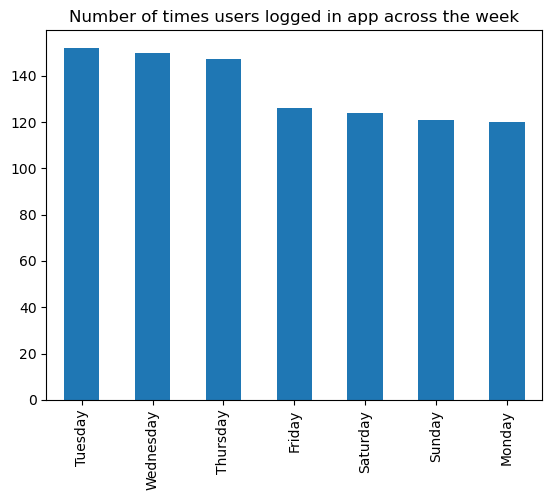

In [14]:
pd.Series(df_activity.day_of_the_week).value_counts(sort=False).plot(kind='bar', 
                                                                     title= "Number of times users logged in app across the week")

##### Fréquence d'utilisation sur la semaine

Dans cet histogramme, nous examinons la fréquence d'utilisation de l'application FitBit en termes de jours de la semaine.

1 - Nous avons découvert que les utilisateurs préfèrent ou se souviennent (leur donnant le doute d'un avantage qu'ils ont oublié) de suivre leur activité sur l'application en milieu de semaine du mardi au vendredi.

2 - A noter que la fréquence a baissé le vendredi et se poursuit le week-end et le lundi.

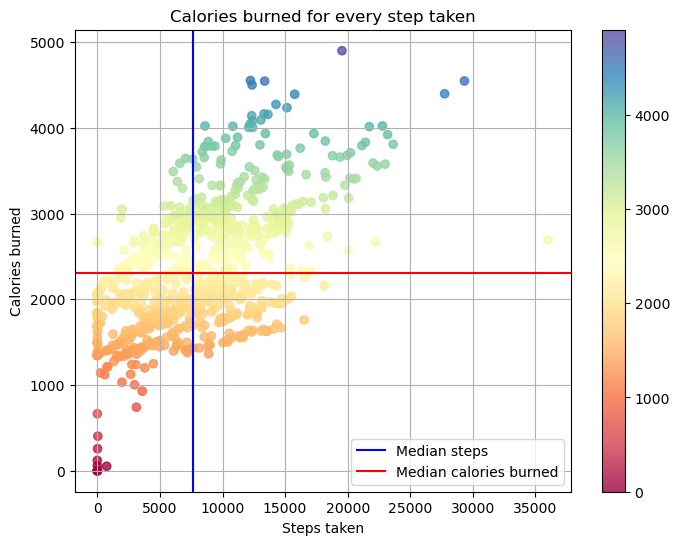

In [15]:
# import matplotlib package
import matplotlib.pyplot as plt

# plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6)) # specify size of the chart
plt.scatter(df_activity.total_steps, df_activity.calories, 
            alpha = 0.8, c = df_activity.calories, 
            cmap = "Spectral")

# add annotations and visuals
median_calories = 2303
median_steps = 7637

plt.colorbar(orientation = "vertical")
plt.axvline(median_steps, color = "Blue", label = "Median steps")
plt.axhline(median_calories, color = "Red", label = "Median calories burned")
plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("Calories burned for every step taken")
plt.grid(True)
plt.legend()
plt.show()

##### Calories brûlées pour chaque pas effectué

À partir du nuage de points, nous avons découvert que :

1 - C'est une corrélation positive.

2 - Nous avons observé que l'intensité des calories brûlées augmentait lorsque les utilisateurs se situaient entre > 0 et 15 000 pas, le taux de calories brûlées diminuant à partir de 15 000 pas.

3 - A noté quelques valeurs aberrantes :

- Zéro pas avec zéro à un minimum de calories brûlées.
- 1 observation de > 35 000 pas avec < 3 000 calories brûlées.
- Déduit que les valeurs aberrantes pourraient être dues à une variation naturelle des données, à un changement dans l'utilisation de l'utilisateur ou à des erreurs dans la collecte de données (c'est-à-dire, erreurs de calcul, contamination des données ou erreur humaine).

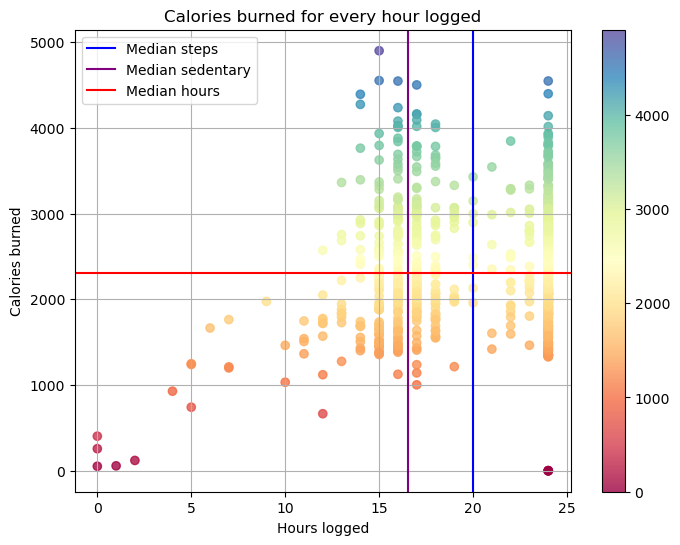

In [16]:
# import matplotlib package
import matplotlib.pyplot as plt

# plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6)) # Specify size of the chart
plt.scatter(df_activity.total_hours, df_activity.calories, 
            alpha = 0.8, c = df_activity.calories, 
            cmap = "Spectral")

# adding annotations and visuals
median_calories = 2303
median_hours = 20
median_sedentary = 991 / 60

plt.colorbar(orientation = "vertical")
plt.axvline(median_hours, color = "Blue", label = "Median steps")
plt.axvline(median_sedentary, color = "Purple", label = "Median sedentary")
plt.axhline(median_calories, color = "Red", label = "Median hours")
plt.xlabel("Hours logged")
plt.ylabel("Calories burned")
plt.title("Calories burned for every hour logged")
plt.legend()
plt.grid(True)
plt.show()

##### Calories brûlées pour chaque heure enregistrée

Le nuage de points montre :

1 - Une faible corrélation positive selon laquelle l'augmentation des heures enregistrées ne se traduit pas par plus de calories brûlées. Cela est largement dû aux heures sédentaires moyennes (ligne violette) tracées dans la plage de 16 à 17 heures.

2 - Encore une fois, nous pouvons voir quelques valeurs aberrantes :

- Les mêmes valeurs aberrantes nulles
- Un point rouge inhabituel aux 24 heures avec zéro calorie brûlée qui peut être dû aux mêmes raisons que ci-dessus.

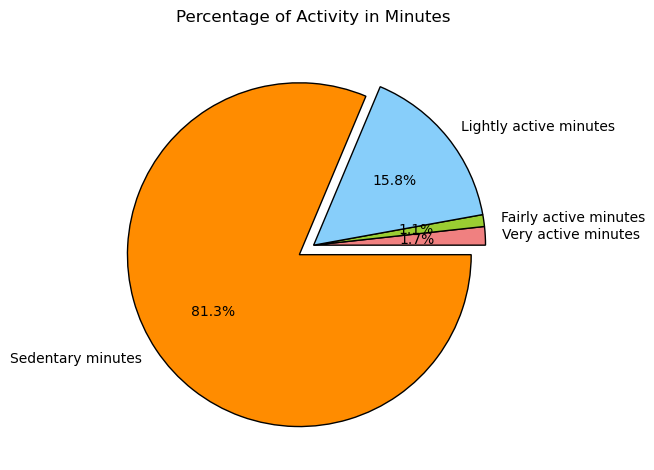

In [17]:
# import packages
import matplotlib.pyplot as plt
import numpy as np

# calculating total of individual minutes column
very_active_mins = df_activity["very_active_mins"].sum()
fairly_active_mins = df_activity["fairly_active_mins"].sum()
lightly_active_mins = df_activity["lightly_active_mins"].sum()
sedentary_mins = df_activity["sedentary_mins"].sum()

# plotting pie chart
slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colours = ["lightcoral", "yellowgreen", "lightskyblue", "darkorange"]
explode = [0, 0, 0, 0.1]
plt.style.use("default")
plt.pie(slices, labels = labels, 
        colors = colours, wedgeprops = {"edgecolor": "black"}, 
        explode = explode, autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()

##### Pourcentage d'activité en minutes

Comme on le voit sur le camembert :

1 - Les minutes sédentaires prennent la plus grande part à 81,3 %.

2 - Cela indique que les utilisateurs utilisent l'application FitBit pour enregistrer des activités quotidiennes telles que les trajets quotidiens, les mouvements inactifs (se déplacer d'un endroit à un autre) ou faire des courses.

3 - L'application est rarement utilisée pour suivre la condition physique (c'est-à-dire la course) selon le pourcentage mineur d'activité assez active (1,1 %) et d'activité très active (1,7 %). Ceci est très décourageant car l'application FitBit a été développée pour encourager la forme physique.

### ÉTAPE 6 : AGIR

Dans la dernière étape, nous fournirons nos idées et fournirons des recommandations basées sur notre analyse.

Ici, nous revisitons nos questions business et partageons avec vous nos recommandations business de haut niveau.

#### 1. Quelles sont les tendances identifiées ?

- La majorité des utilisateurs (81,3 %) utilisent l'application FitBit pour suivre les activités sédentaires et ne l'utilisent pas pour suivre leurs habitudes de santé.  


- Les utilisateurs préfèrent suivre leurs activités en semaine plutôt qu'en week-end, peut-être parce qu'ils passent plus de temps à l'extérieur en semaine et qu'ils restent chez eux le week-end.

#### 2. Comment ces tendances pourraient-elles s'appliquer aux clients de Bellabeat ?

- Les deux sociétés développent des produits visant à fournir aux femmes des données sur leur santé, leurs habitudes et leur condition physique et à les encourager à comprendre leurs habitudes actuelles et à prendre des décisions saines. Ces tendances communes entourant la santé et la forme physique peuvent très bien être appliquées aux clients de Bellabeat.

#### 3. Comment ces tendances pourraient-elles influencer la stratégie marketing de Bellabeat ?

- L'équipe marketing de Bellabeat peut encourager les utilisateurs en les éduquant et en les dotant de connaissances sur les avantages de la forme physique, suggérer différents types d'exercices (c'est-à-dire un exercice simple de 10 minutes en semaine et un exercice plus intense le week-end) et des informations sur l'apport calorique et le taux brûlé sur l'application Bellabeat .


- Le week-end, l'application Bellabeat peut également demander une notification pour encourager les utilisateurs à faire de l'exercice.